In [ ]:
import os
import cv2
import torch
import numpy as np
from segment_anything import SamPredictor, sam_model_registry

# Load image
image_path = "your_xray_image.png"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load model checkpoint
model_path = "work_dir/LiteMedSAM/LiteMedSAM.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model
sam = sam_model_registry["vit_t"](checkpoint=model_path)
sam.to(device)
predictor = SamPredictor(sam)
predictor.set_image(image_rgb)

# Define a bounding box over the lung area (manually or using detection logic)
H, W, _ = image.shape
bbox = np.array([int(0.1 * W), int(0.2 * H), int(0.9 * W), int(0.95 * H)])

# Inference using the bounding box
masks, scores, logits = predictor.predict(box=bbox)

# Show result
import matplotlib.pyplot as plt

plt.imshow(image_rgb)
plt.imshow(masks[0], alpha=0.5, cmap='jet')  # overlay
plt.title("LiteMedSAM Lung Mask")
plt.axis('off')
plt.show()


In [17]:
import numpy as np
from PIL import Image
import cv2

# Load the PNG image
img = Image.open("../datasets/cxr/images/00000001_000.png").convert("RGB")  # or "L" for grayscale
img_array = np.array(img)

def auto_box(image):
    img = Image.open("../datasets/cxr/images/00000001_000.png").convert("L")
    img_array = np.array(img)
    _, thresh = cv2.threshold(img_array, 30, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Combine all contours
    x, y, w, h = cv2.boundingRect(np.vstack(contours))
    return np.array([[x, y, x + w, y + h]])

# Save to .npz
np.savez("../MedSAM/test_demo/image_data.npz", imgs=img_array, boxes=auto_box(img))

In [18]:
data = np.load("../MedSAM/test_demo/image_data.npz")
print(data.files)  # Shows all available keys

['imgs', 'boxes']


Available keys: ['segs']


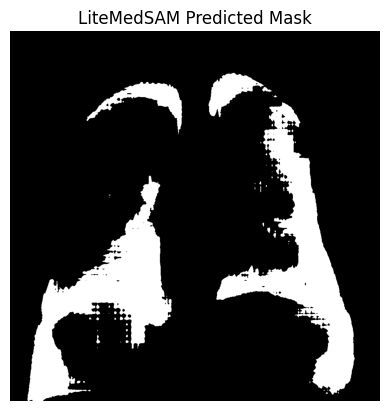

In [22]:
import numpy as np
import matplotlib.pyplot as plt
# Load the .npz file
data = np.load("../MedSAM/test_demo/segs/image_data.npz")

# Check keys
print("Available keys:", data.files)

# Extract and visualize the predicted mask
mask = data["segs"]  # (H, W) binary or 0-255

plt.imshow(mask, cmap="gray")
plt.title("LiteMedSAM Predicted Mask")
plt.axis("off")
plt.show()

Available keys: ['imgs', 'boxes']


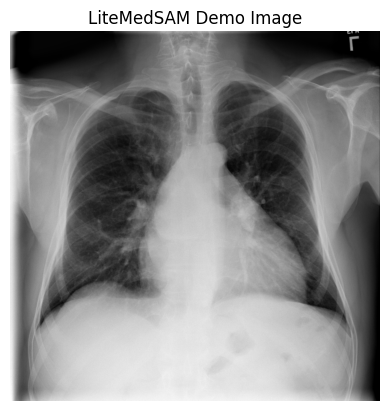

In [21]:
# Load the .npz file
data = np.load("../MedSAM/test_demo/image_data.npz")

# Check keys
print("Available keys:", data.files)

# Extract and visualize the predicted mask
mask = data["imgs"]  # (H, W) binary or 0-255

plt.imshow(mask, cmap="gray")
plt.title("LiteMedSAM Demo Image")
plt.axis("off")
plt.show()